#Analysis of IMDb Movies Reviews Dataset for Sentiment Analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import string
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
import IPython

# For Text Processing
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

!pip install scattertext 
import spacy
import scattertext as st

# For Deep Learning Models
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, RNN, Bidirectional,GlobalMaxPool1D,BatchNormalization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 28.1 MB/s 
     |████████████████████████████████| 24.1 MB 94.1 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=3009fef87e60130c54899d104c8cd3249a198f78ba5574e4a70bdcb07672be18
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Loading Datasets

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/DL_dataset/week7/Train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/DL_dataset/week7/Test.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/DL_dataset/week7/Valid.csv")

In [3]:
display(train_data.head())
print("Shape: ",train_data.shape)

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

Shape:  (40000, 2)


In [4]:
display(test_data.head())
print("Shape: ",test_data.shape)

text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

Shape:  (5000, 2)


In [5]:
display(valid_data.head())
print("Shape: ",valid_data.shape)

text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
2  The Guidelines state that a comment must conta...      0
3  This movie is a muddled mish-mash of clichés f...      0
4  Before Stan Laurel became the smaller half of ...      0

Shape:  (5000, 2)


In [6]:
print("Train Data: \n",train_data['label'].value_counts())

Train Data: 
 0    20019
1    19981
Name: label, dtype: int64


In [7]:
print("Test Data: \n",test_data['label'].value_counts())

Test Data: 
 1    2505
0    2495
Name: label, dtype: int64


In [8]:
print("Validation Data: \n",valid_data['label'].value_counts())

Validation Data: 
 1    2514
0    2486
Name: label, dtype: int64


Preprocessing the Text

##1. Perform required text pre-processing: <br>lowering text, removing URLs, punctuation , stop wordsand correct spelling

In [74]:
from textblob import TextBlob
stop_words = set(stopwords.words("english")) 
# Function for Text Processing
def clean_text(text):
    # Remove HTML Tags and statements
    text = re.sub('<[^>]*>','',text)

    # Remove URLs from text
    text = re.sub(r'https\S','',text)

    # Remove Punctuation and special keys 
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)

    # Normalize the text
    text = text.lower()

    # Remove stopwords
    text = [word for word in text.split(" ") if not word in stop_words]

    text = " ".join(text)

    # For spelling corrections 
    #text= TextBlob(text).correct()  # I am not including because it significantly slows the process considering the datasize
    return text

In [17]:
train_data['Processed_Reviews'] = train_data['text'].apply(lambda x: clean_text(x))

In [75]:
test_data['Processed_Reviews'] = test_data['text'].apply(lambda x: clean_text(x))

In [19]:
valid_data['Processed_Reviews'] = valid_data['text'].apply(lambda x: clean_text(x))

In [20]:
train_data.head()

text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                   Processed_Reviews  
0  grew b 1965 watching loving thunderbirds mates...  
1  put movie dvd player sat coke chips expectatio...  
2  people know particular time past like feel nee...  
3  even though great interest biblical movies bor...  
4  im die hard dads army fan nothing ever change ...

##2. Perform tokenization and lemmatization on cleaned data .

In [21]:
lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):
    # Tokenize the text
    text = word_tokenize(text)

    # Lemmatize the words(tokens)
    text = [lemmatizer.lemmatize(token) for token in text]

    text = " ".join(text)
    return text

In [22]:
train_data['Processed_Reviews'] = train_data['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))

In [76]:
test_data['Processed_Reviews'] = test_data['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))

In [24]:
valid_data['Processed_Reviews'] = valid_data['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))

In [25]:
train_data.head()

text  label  \
0  I grew up (b. 1965) watching and loving the Th...      0   
1  When I put this movie in my DVD player, and sa...      0   
2  Why do people who do not know what a particula...      0   
3  Even though I have great interest in Biblical ...      0   
4  Im a die hard Dads Army fan and nothing will e...      1   

                                   Processed_Reviews  
0  grew b 1965 watching loving thunderbird mate s...  
1  put movie dvd player sat coke chip expectation...  
2  people know particular time past like feel nee...  
3  even though great interest biblical movie bore...  
4  im die hard dad army fan nothing ever change g...

##3. Visualize the most frequent words **and** bigrams

In [26]:
def get_top_n_frequent_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
freq_words = get_top_n_frequent_words(train_data['Processed_Reviews'])
freq_words_df = pd.DataFrame(freq_words, columns = ['Unigram Text' , 'Count'])
freq_words_df.head(10)

Unigram Text  Count
0        movie  80221
1         film  72680
2         like  32396
3         time  24062
4         good  23354
5    character  22266
6        story  19624
7         make  19153
8       really  18460
9        scene  16694

[9808, 9272, 3987, 2981, 2870, 2820, 2464, 2277, 2267, 2132]

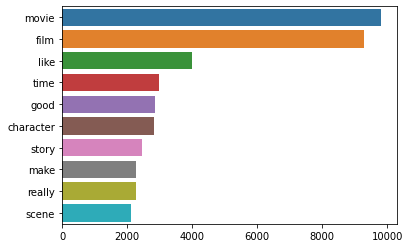

In [28]:
# Visualising the most frequent unigrams in the tweets i.e; top 10 
top_unigrams = get_top_n_frequent_words(test_data['Processed_Reviews'],10)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)
display(y)

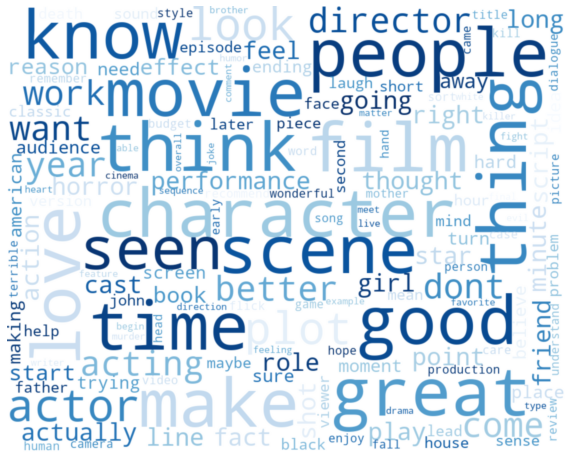

In [29]:
# Visualizing for unigram text
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(freq_words_df['Unigram Text']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [30]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
bigram_words = get_top_n_bigram(train_data['Processed_Reviews'])
bigram_words_df = pd.DataFrame(bigram_words,columns=['Bigram words','count'])
bigram_words_df.head(10)

Bigram words  count
0       look like   2428
1        ive seen   2062
2  special effect   1767
3      movie like   1607
4  main character   1522
5        year old   1446
6      good movie   1278
7    horror movie   1230
8       dont know   1195
9      waste time   1182

[264, 249, 219, 198, 196, 190, 165, 159, 155, 153]

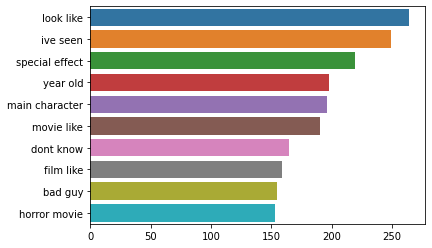

In [32]:
# Visualising the most frequent Bigrams in the tweets i.e; top 10 
top_unigrams = get_top_n_bigram(test_data['Processed_Reviews'],10)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)
display(y)

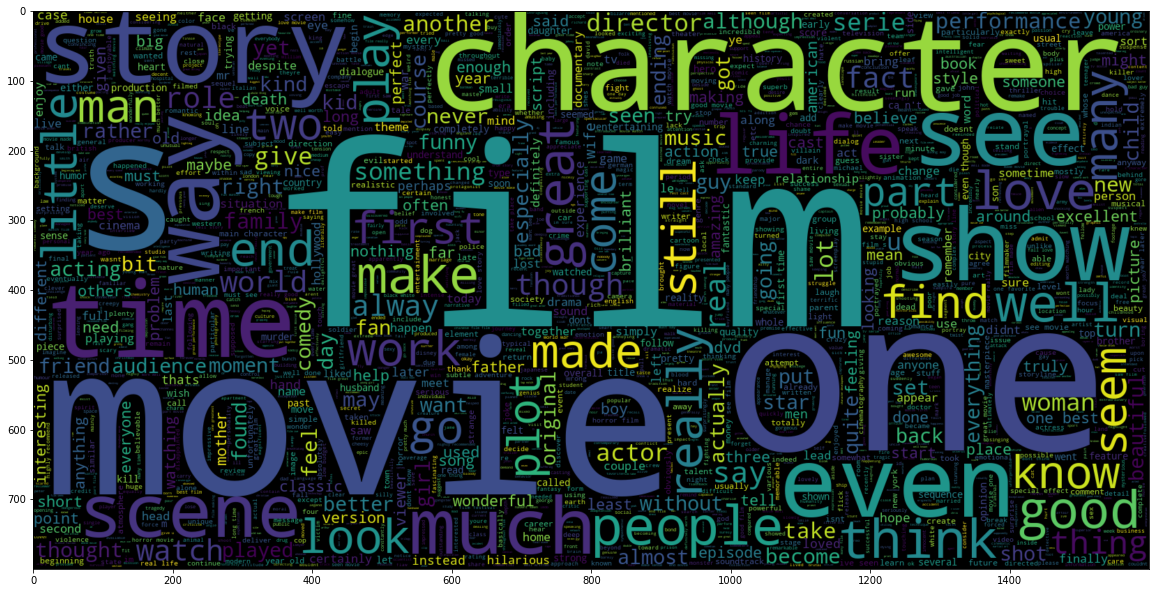

In [33]:
from wordcloud import WordCloud

# Visualizing for entire text
plt.figure(figsize = (20,20)) 
wc = WordCloud(
    max_words = 2000 ,
    width = 1600 ,
    height = 800).generate(" ".join(train_data[train_data.label == 1].Processed_Reviews))
    
plt.imshow(wc , interpolation = 'bilinear')

##4. Visualize the practical words that represent positive and negative sentiment in the dataset.

In [34]:
nlp = spacy.load('en_core_web_sm')
train_data['parsed'] = train_data.Processed_Reviews[:1000].apply(nlp)

corpus_data = train_data.copy()
corpus_data["label"] = corpus_data["label"].astype(str)
corpus_viz = st.CorpusFromParsedDocuments(corpus_data.iloc[:1000,:],
                             category_col='label',
                             parsed_col='parsed').build()



In [35]:
html = st.produce_scattertext_explorer(corpus_viz,
          category='1',
          category_name='1',
          not_category_name='0',
          width_in_pixels=700,
          minimum_term_frequency=15,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
)

In [36]:
file_name = 'terms_pair1.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IPython.display.HTML(filename=file_name)

In [37]:
from textblob import TextBlob

train_data['polarity'] = train_data['Processed_Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_data['review_len'] = train_data['Processed_Reviews'].apply(lambda x:len(x))
train_data['word_count'] = train_data['Processed_Reviews'].apply(lambda x: len(x.split()))

In [38]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

train_data['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    yTitle='count',
    title='Sentiment Polarity Distribution')

##5. Create  an  embedding  layer  and  build  a  15  layer  LSTM and  a 20  layer  BidRNN  for predicting the sentiment.

Tokenizing and padding the Text

In [39]:
# Maximum features in a reviews
max_feat = 6000
embed_size=128

tokenizer = Tokenizer(num_words=max_feat)
tokenizer.fit_on_texts(train_data["Processed_Reviews"])
list_tokenized_train = tokenizer.texts_to_sequences(train_data["Processed_Reviews"])
list_tokenized_valid = tokenizer.texts_to_sequences(valid_data["Processed_Reviews"])
list_tokenized_test = tokenizer.texts_to_sequences(test_data["Processed_Reviews"])

x_valid = pad_sequences(list_tokenized_valid, maxlen=130)
y_valid = valid_data['label']

x_test = pad_sequences(list_tokenized_test, maxlen=130)
y_test = test_data['label']

x_train = pad_sequences(list_tokenized_train, maxlen=130)
y_train = train_data['label']

# Function to pass Validation Data
def valid_gen():
  return x_valid, y_valid

###Model with 15 LSTM Layers 

In [40]:
# Deep Learning Model with LSTM Layers
model = keras.Sequential()
model.add(Embedding(max_feat,embed_size))
for i in range(1,16):
  model.add(LSTM(20, return_sequences=True))
  model.add(Dropout(0.6))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

batch_size = 200
epochs = 10
hist_lstm = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=valid_gen())


Epoch 1/10
200/200 [==============================] - 46s 99ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 2/10
200/200 [==============================] - 16s 81ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 3/10
200/200 [==============================] - 15s 74ms/step - loss: 0.6850 - accuracy: 0.5241 - val_loss: 0.6517 - val_accuracy: 0.7156
Epoch 4/10
200/200 [==============================] - 15s 75ms/step - loss: 0.5077 - accuracy: 0.7594 - val_loss: 0.5235 - val_accuracy: 0.7958
Epoch 5/10
200/200 [==============================] - 15s 75ms/step - loss: 0.4285 - accuracy: 0.8121 - val_loss: 0.4893 - val_accuracy: 0.8142
Epoch 6/10
200/200 [==============================] - 15s 75ms/step - loss: 0.3967 - accuracy: 0.8329 - val_loss: 0.4854 - val_accuracy: 0.8142
Epoch 7/10
200/200 [==============================] - 15s 75ms/step - loss: 0.3759 - accuracy: 0.8441 - val_loss: 0.4708 - val_accuracy:

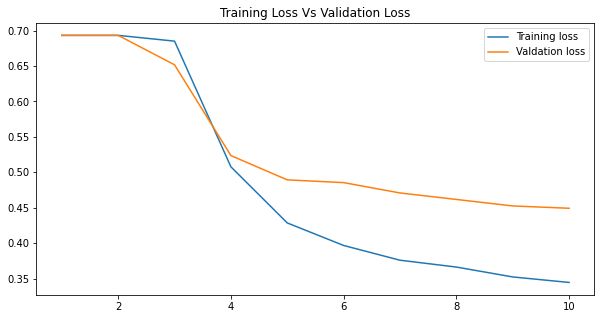

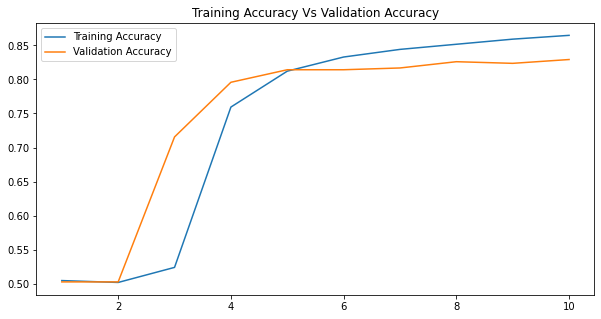

In [41]:
loss = hist_lstm.history['loss']
acc = hist_lstm.history['accuracy']
val_loss = hist_lstm.history['val_loss']
val_acc = hist_lstm.history['val_accuracy']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training Accuracy Vs Validation Accuracy")
plt.legend()
plt.show()

Since there is a huge gap between Train vs Validation Loss, clearly the model overfits<br>
Test Accuracy is 83% which is pretty good.

In [42]:
# Test accuracy
model.evaluate(x_test,y_test)

157/157 [==============================] - 9s 33ms/step - loss: 0.4414 - accuracy: 0.8336


[0.44144344329833984, 0.8335999846458435]

###Bidrectional RNN Model with 20 Layers of LSTM

In [43]:
# Maximum features in a reviews
max_feat = 6000
embed_size=128

model2 = keras.Sequential()
model2.add(Embedding(max_feat,embed_size))
for i in range(1,21):
  model2.add(Bidirectional(LSTM(20, return_sequences=True)))
  model2.add(Dropout(0.6))
model2.add(GlobalMaxPool1D())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

batch_size = 200
epochs = 10
hist_bidrnn = model2.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=valid_gen())


Epoch 1/10
200/200 [==============================] - 92s 255ms/step - loss: 0.6433 - accuracy: 0.5805 - val_loss: 0.5568 - val_accuracy: 0.8228
Epoch 2/10
200/200 [==============================] - 39s 194ms/step - loss: 0.3664 - accuracy: 0.8550 - val_loss: 0.4709 - val_accuracy: 0.8580
Epoch 3/10
200/200 [==============================] - 38s 190ms/step - loss: 0.2973 - accuracy: 0.8885 - val_loss: 0.4310 - val_accuracy: 0.8726
Epoch 4/10
200/200 [==============================] - 38s 191ms/step - loss: 0.2695 - accuracy: 0.9014 - val_loss: 0.4214 - val_accuracy: 0.8734
Epoch 5/10
200/200 [==============================] - 38s 190ms/step - loss: 0.2471 - accuracy: 0.9115 - val_loss: 0.3939 - val_accuracy: 0.8758
Epoch 6/10
200/200 [==============================] - 38s 192ms/step - loss: 0.2332 - accuracy: 0.9174 - val_loss: 0.3696 - val_accuracy: 0.8778
Epoch 7/10
200/200 [==============================] - 38s 191ms/step - loss: 0.2192 - accuracy: 0.9242 - val_loss: 0.3784 - val_ac

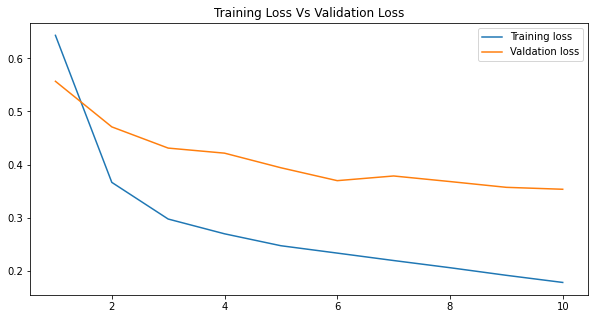

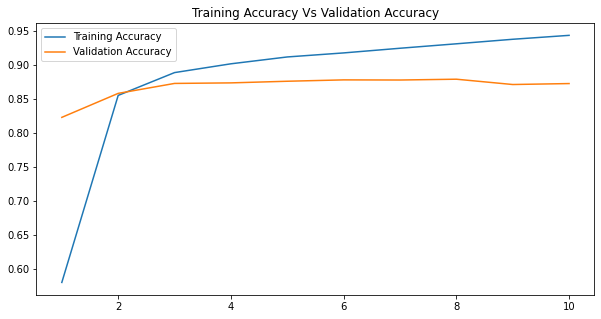

In [44]:
loss = hist_bidrnn.history['loss']
acc = hist_bidrnn.history['accuracy']
val_loss = hist_bidrnn.history['val_loss']
val_acc = hist_bidrnn.history['val_accuracy']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training Accuracy Vs Validation Accuracy")
plt.legend()
plt.show()

This model also overfits since there is pretty huge gap between Train vs Vaidation loss curve.<br>
But the Test Accuracy is 87% which is also good

In [45]:
# Test accuracy
model2.evaluate(x_test,y_test)

157/157 [==============================] - 24s 80ms/step - loss: 0.3482 - accuracy: 0.8738


[0.34822914004325867, 0.8737999796867371]

##6. Build your own test dataset with 10 movie reviews and tabulate accuracy.

In [84]:
test_reviews = {
  "The movie is good and graphics are also pretty descent, kudos to the makers!. Worth watching":1,
  "It was pretty boring, such a waste of time":0,
  "Don’t be fooled by the title for if you crave misery, injustice, sadness, and suicidal depression this film is all about that and nothing else.":0,
  "I only made it through about 20 minutes but that was enough to convince me it’s the ickiest movie.":0,
  "I loved the movie far more than i should have, not that doesn't mean it is perfect":1,
  "If you can keep both eyes open through its whole three-hour length you're a better man than I am.":0,
  "It is the rare movie that succeeds on every level":1,
  "It doesn't matter how much you enjoy film, you're better off saving your money, popcorn and time, such a waste":0,
  "I can’t stop telling people to watch this movie.":1,
  "Impossibly good movie.":1
}
test_df = pd.DataFrame(list(test_reviews.items()),columns=["text","label"])
display(test_df)

text  label
0  The movie is good and graphics are also pretty...      1
1         It was pretty boring, such a waste of time      0
2  Don’t be fooled by the title for if you crave ...      0
3  I only made it through about 20 minutes but th...      0
4  I loved the movie far more than i should have,...      1
5  If you can keep both eyes open through its who...      0
6  It is the rare movie that succeeds on every level      1
7  It doesn't matter how much you enjoy film, you...      0
8   I can’t stop telling people to watch this movie.      1
9                             Impossibly good movie.      1

In [85]:
test_df['Processed_Reviews'] = test_df['text'].apply(lambda x: clean_text(x))
test_df['Processed_Reviews'] = test_df['Processed_Reviews'].apply(lambda x: tokenize_lemmatize(x))
display(test_df)
list_tokenized_testing = tokenizer.texts_to_sequences(test_df["Processed_Reviews"])


x_testing = pad_sequences(list_tokenized_testing, maxlen=130)
y_testing = test_df['label']

text  label  \
0  The movie is good and graphics are also pretty...      1   
1         It was pretty boring, such a waste of time      0   
2  Don’t be fooled by the title for if you crave ...      0   
3  I only made it through about 20 minutes but th...      0   
4  I loved the movie far more than i should have,...      1   
5  If you can keep both eyes open through its who...      0   
6  It is the rare movie that succeeds on every level      1   
7  It doesn't matter how much you enjoy film, you...      0   
8   I can’t stop telling people to watch this movie.      1   
9                             Impossibly good movie.      1   

                                   Processed_Reviews  
0  movie good graphic also pretty descent kudos m...  
1                           pretty boring waste time  
2  dont fooled title crave misery injustice sadne...  
3       made 20 minute enough convince ickiest movie  
4                loved movie far doesnt mean perfect  
5  keep eye open whole threehour length youre bet...  
6                    rare movie succeeds every level  
7  doesnt matter much enjoy film youre better sav...  
8               cant stop telling people watch movie  
9                              impossibly good movie

In [86]:
model.evaluate(x_testing,y_testing)

1/1 [==============================] - 0s 56ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936861276626587, 0.5]

In [87]:
model2.evaluate(x_testing,y_testing)

1/1 [==============================] - 0s 118ms/step - loss: 0.4968 - accuracy: 0.9000


[0.4967687726020813, 0.8999999761581421]

Bidirectional Model works much better than normal